In [100]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
%pwd

'C:\\Users\\ojime\\OneDrive\\Desktop\\Datasets'

In [2]:
#Import dataset
insurance = pd.read_csv("C:/Users/ojime/OneDrive/Desktop/Datasets/insurance.csv")


In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().values.any()

False

## Exploratory Data Analysis

In [13]:
sns.set_style('whitegrid')

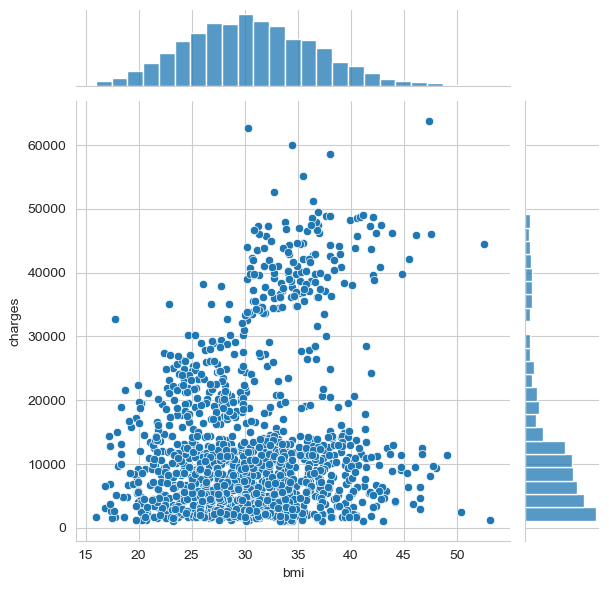

In [14]:
sns.jointplot(x='bmi',y='charges',data=insurance)

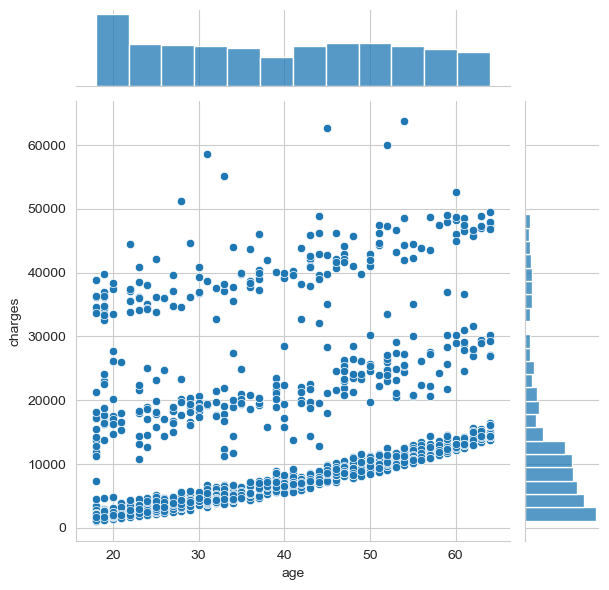

In [15]:
sns.jointplot(x='age',y='charges',data=insurance)

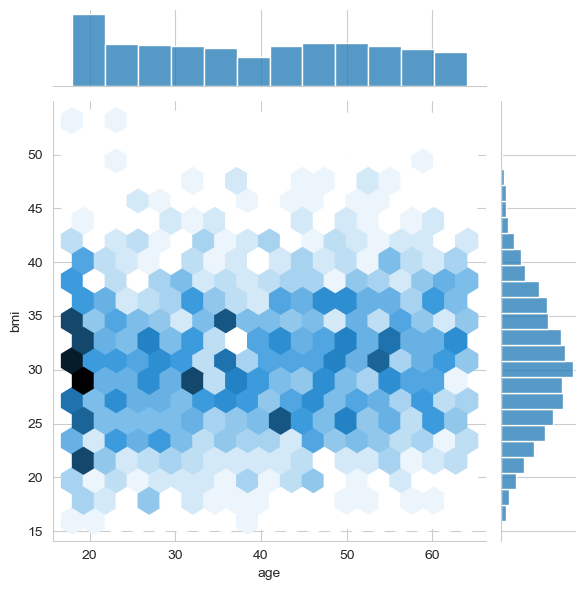

In [16]:
sns.jointplot(x='age',y='bmi',kind='hex',data=insurance)

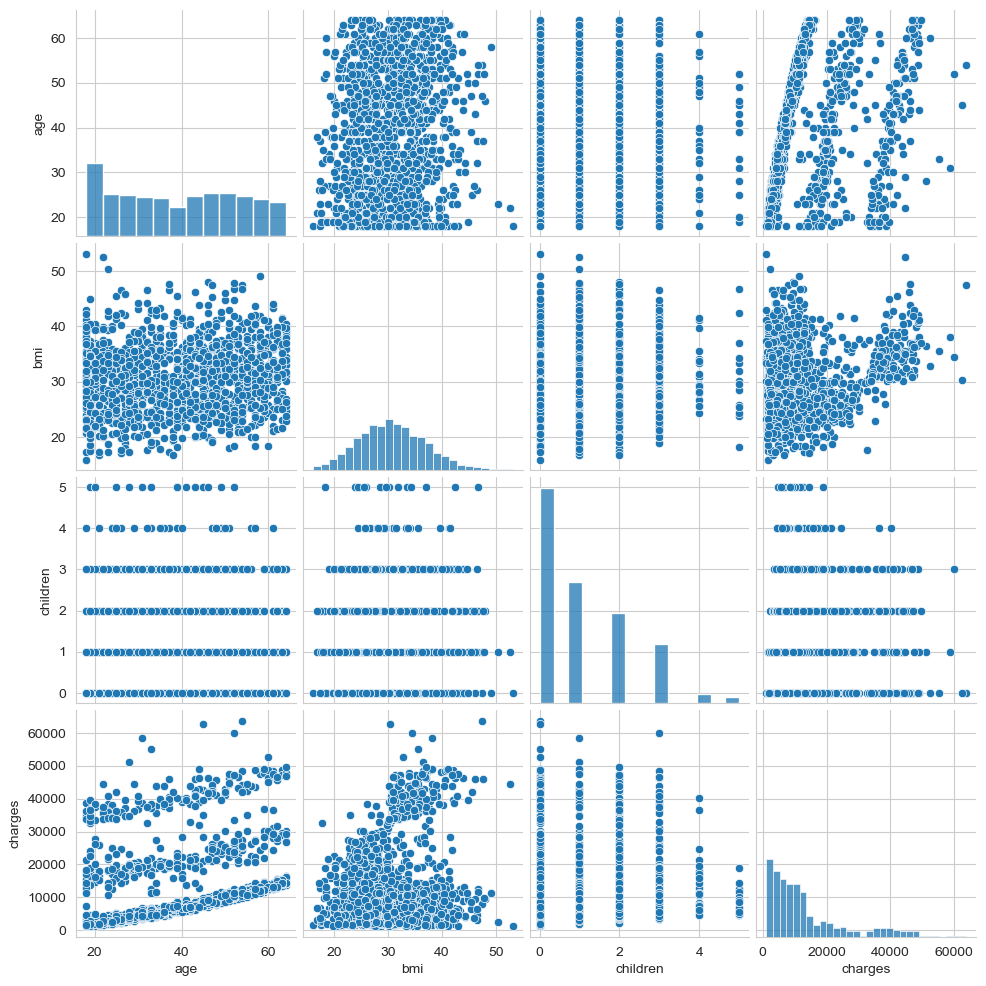

In [17]:
sns.pairplot(insurance)

In [18]:
# based on the previous figure, by looking at the plots, the strongest correlation seems to happen between charges(y) and age(x)

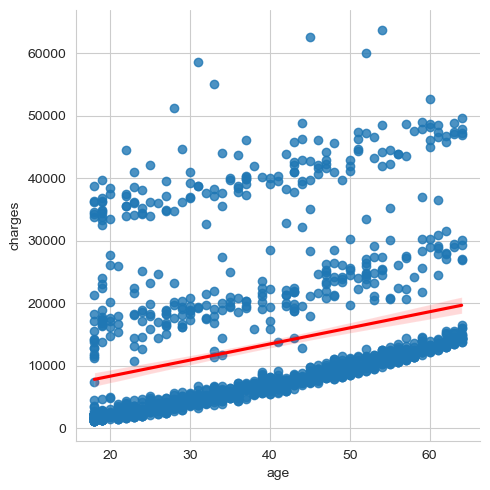

In [20]:
sns.lmplot(x='age',y='charges',data=insurance, line_kws={"color": "red"})

## Train and test data

In [62]:
y = insurance['charges']

In [63]:
X = insurance[['age', 'bmi', 'children']]

In [64]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Train model

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lm = LinearRegression()

In [96]:
lm.fit(X_train,y_train)

LinearRegression()

In [98]:
lm.score(X_train, y_train)

0.11770834190185453

In [99]:
lm.score(X_test, y_test)

0.12342534780862424

## Predict test data